In [ ]:
pip install pandas

In [ ]:
import numpy as np
n = np.arange(10)
print(n)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
N=n.reshape(2,5)
print(N)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [ ]:
M=n.reshape(5,2)
print(M)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [ ]:
print(np.dot(M,N))

[[  5   6   7   8   9]
 [ 15  20  25  30  35]
 [ 25  34  43  52  61]
 [ 35  48  61  74  87]
 [ 45  62  79  96 113]]


In [ ]:
n2=n[n%2!=0]
print(n2)

[1 3 5 7 9]


In [ ]:
m=[n>2]
print(m)

[array([False, False, False,  True,  True,  True,  True,  True,  True,
        True])]


In [ ]:
n3=np.arange(20)
n3[n3%2!=0]=15
print(n3)

[ 0 15  2 15  4 15  6 15  8 15 10 15 12 15 14 15 16 15 18 15]


In [ ]:
P=np.array([25,14,12,28,3])
P[P%2==0]*=-1
print(P)

[ 25 -14 -12 -28   3]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.insert(0, 'Id', range(1, len(df) + 1))

In [ ]:
#2)
from sklearn.datasets import load_iris

iris = load_iris()
print("Keys:", iris.keys())
print("Number of rows & columns:", iris.data.shape)
print("Feature Names:", iris.feature_names)
print("Description:\n", iris.DESCR[:500])

Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Number of rows & columns: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====


In [ ]:

#3)
print("Number of observations:", len(df))
print("Missing values per column:\n", df.isnull().sum())#3)

Number of observations: 150
Missing values per column:
 Id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [ ]:
#4)
print(df.describe())

               Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.057333           3.758000   
std     43.445368           0.828066          0.435866           1.765298   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000           1.600000   
50%     75.500000           5.800000          3.000000           4.350000   
75%    112.750000           6.400000          3.300000           5.100000   
max    150.000000           7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
#5)
for species in df['Species'].unique():
    print(f"\nObservations for {species}:")
    print(df[df['Species'] == species].head(3))


Observations for setosa:
   Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   

   petal width (cm) Species  
0               0.2  setosa  
1               0.2  setosa  
2               0.2  setosa  

Observations for versicolor:
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
50  51                7.0               3.2                4.7   
51  52                6.4               3.2                4.5   
52  53                6.9               3.1                4.9   

    petal width (cm)     Species  
50               1.4  versicolor  
51               1.5  versicolor  
52               1.5  versicolor  

Observations for virginica:
      Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
100  101                6.3               3.3                

In [ ]:
#6)
df_no_id = df.drop(columns='Id')
print(df_no_id.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
#7)
print(df.iloc[0:1, 0:4])

   Id  sepal length (cm)  sepal width (cm)  petal length (cm)
0   1                5.1               3.5                1.4


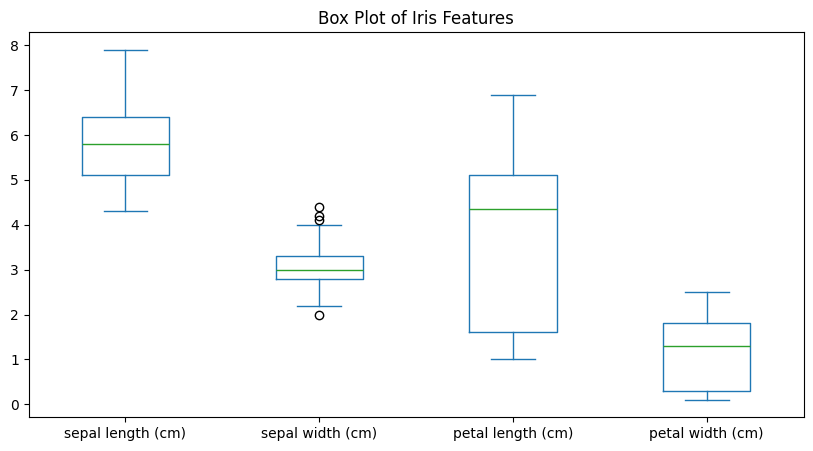

In [ ]:
#8)
df_no_id.drop(columns='Species').plot(kind='box', figsize=(10,5))
plt.title("Box Plot of Iris Features")
plt.show()

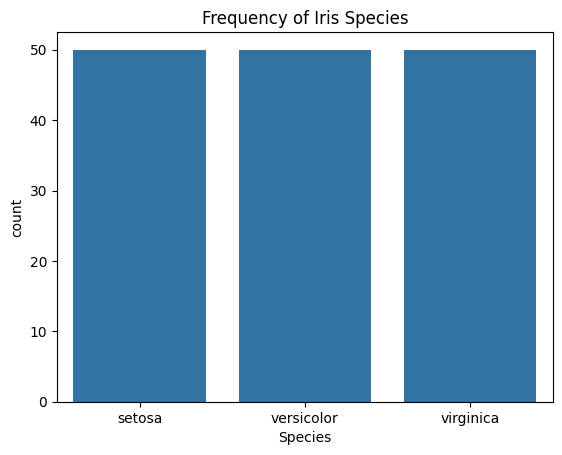

In [ ]:
#9)
sns.countplot(x='Species', data=df)
plt.title("Frequency of Iris Species")
plt.show()

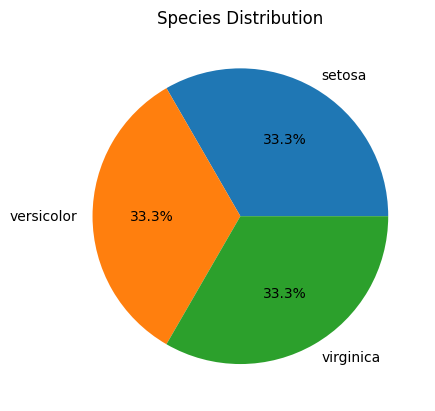

In [ ]:
#10)
df['Species'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Species Distribution")
plt.ylabel('')
plt.show()


In [ ]:
#
from google.colab import files
uploaded = files.upload()
import pandas as pd
import pandas as pd
data = pd.read_csv('/content/favorite_music_dataset.csv')
print(data.head())


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and train the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


01-08-2025

In [ ]:
#constant features
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv('/content/airlines_flights_data.csv')
df.shape
df['new_column']=0
x_train_numeric = df.select_dtypes(include=[np.number]).columns
constant_features = [feature for feature in x_train_numeric if df[feature].std() == 0]
print("Number of constant features:", len(constant_features))
print("Constant features:", constant_features)
df.drop(labels=constant_features,axis=1,inplace=True)
print(df.head())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/airlines_flights_data.csv')
print("Shape:", df.shape)
null_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
print("Columns with nulls:", null_columns)
x_train_numeric = x_train.select_dtypes(include=[np.number])
constant_features = [feature for feature in x_train_numeric.columns if x_train_numeric[feature].std() == 0]
print("Number of constant features:", len(constant_features))
print("Constant features:", constant_features)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
df=pd.read_csv('/content/drive/MyDrive/ML/titanic_train.csv')

#constant_features
constant_features = [features for features in df.columns if df[features].std==0]
print("constant features:",constant_features)
#quasiconstant features
quasi_constant_features = [col for col in df.columns if df[col].value_counts(normalize=True).max()>0.99]
print("Quasi-constant features:", quasi_constant_features)
df['Sex']=df['Sex'].map({"male":1,"female":0})
df["Embarked"]=df['Embarked'].map({"S":1,"C":0})
print(df.head())
X_train,X_test,y_train,y_test=train_test_split(df[["Pclass","Sex","Embarked"]],df["Survived"],test_size=0.3,random_state=42)
#chi-square
chi_value=chi2(X_train.fillna(0),y_train)
print("chi_square:",chi_value)
pvalues=pd.Series(chi_value[1])
pvalues.index=X_train.columns
pvalues.sort_values(ascending=True)
#anova
chi_value,pvalue = f_classif(X,y)


constant features: []
Quasi-constant features: []
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN       1.0  
1          PC 17599  71.2833   C85       0.0  
2  STON/O2. 3101282   7.9250   NaN       1.0  
3            113803  53.1000  C123       1.0  
4          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd
filepath2 = '/content/drive/MyDrive/sem5/Iris - all-numbers.csv'
df2 = pd.read_csv(filepath2)
print(df2.shape)

(149, 5)


In [ ]:
[col for col in df2.columns if df2[col].isnull().sum()>0] #checking for null values
df2.head()

,5.1,3.5,1.4,0.2,0
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [ ]:
df2.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(
    df2.drop(labels=['species'],axis=1),
    df2['species'],
    test_size=0.3,
    random_state=0
)
print(x_train2.shape)
print(x_test2.shape)

(104, 4)
(45, 4)


In [ ]:
constant_features2 = [ cols for cols in x_train2.columns if x_train2[cols].std() == 0 ]
print(len(constant_features2))

0


 GRADIENT DESCENT


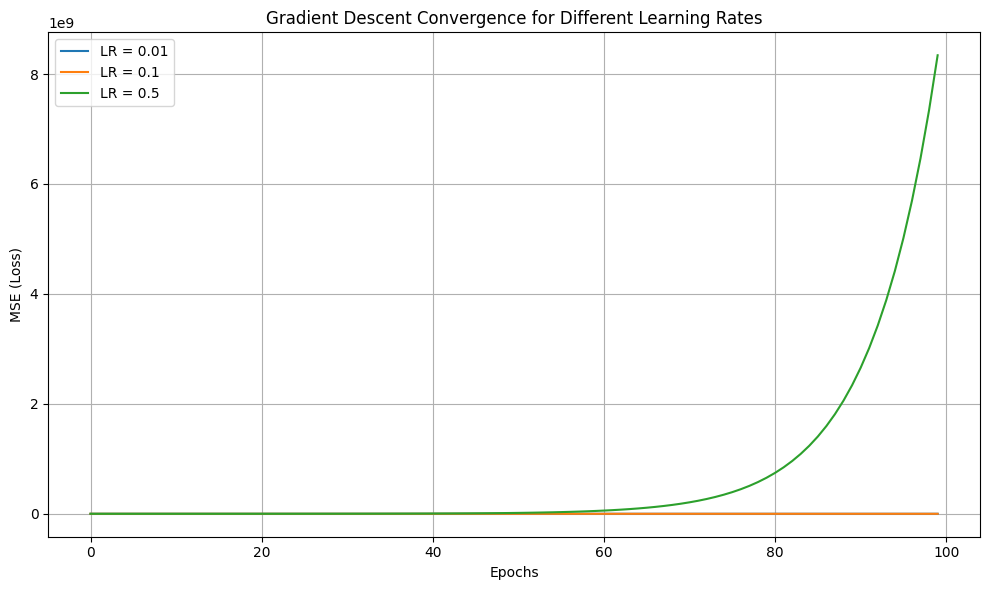

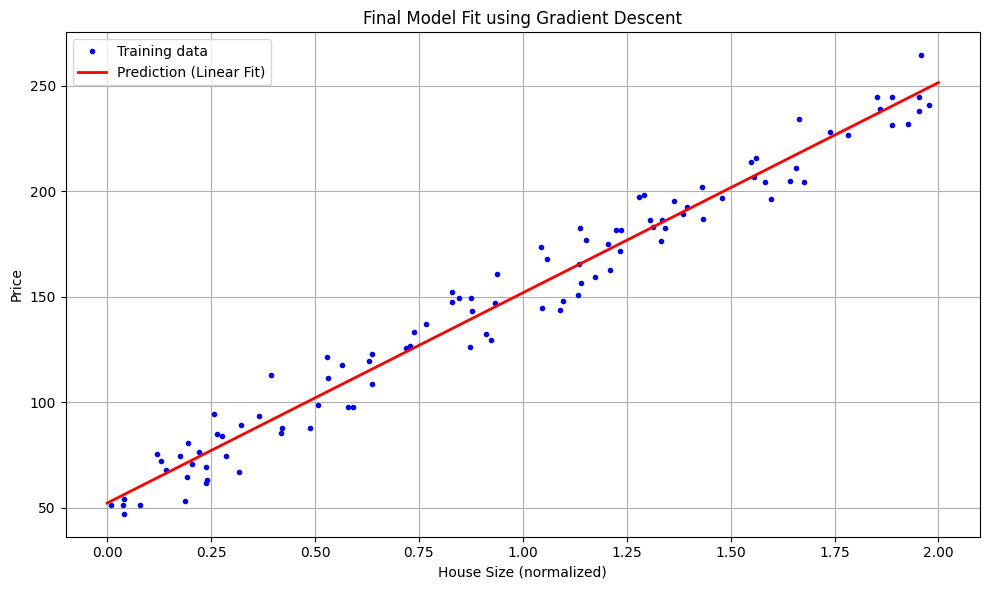

Learned parameters (theta):
Intercept (theta_0): 52.22
Slope     (theta_1): 99.68


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 100 * X + 50 + np.random.randn(100, 1) * 10
X_b = np.c_[np.ones((100, 1)), X]
def gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(y)
    theta = np.random.randn(2, 1)
    history = []
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        mse = np.mean((X.dot(theta) - y) ** 2)
        history.append(mse)
    return theta, history
learning_rates = [0.01, 0.1, 0.5]
iterations = 100
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    _, mse_history = gradient_descent(X_b, y, learning_rate=lr, n_iterations=iterations)
    plt.plot(range(iterations), mse_history, label=f"LR = {lr}")
plt.xlabel("Epochs")
plt.ylabel("MSE (Loss)")
plt.title("Gradient Descent Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
theta_best, _ = gradient_descent(X_b, y, learning_rate=0.1, n_iterations=1000)
X_test = np.array([[0], [2]])
X_test_b = np.c_[np.ones((2, 1)), X_test]
y_pred = X_test_b.dot(theta_best)
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Training data")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Prediction (Linear Fit)")
plt.xlabel("House Size (normalized)")
plt.ylabel("Price")
plt.title("Final Model Fit using Gradient Descent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Learned parameters (theta):")
print(f"Intercept (theta_0): {theta_best[0][0]:.2f}")
print(f"Slope     (theta_1): {theta_best[1][0]:.2f}")

In [ ]:
# Demonstrate the use of Apply Regularization methods (LASSO and RIDGE) on nonlinear data and display the coefficient values and MSE to address the overfitting problem.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
np.random.seed(42)
X=np.sort(5*np.random.rand(80,1),axis=0)
y=

DT,NB,SVM,KNN


Accuracy: 0.7894736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        70
           1       0.76      0.81      0.78        63

    accuracy                           0.79       133
   macro avg       0.79      0.79      0.79       133
weighted avg       0.79      0.79      0.79       133



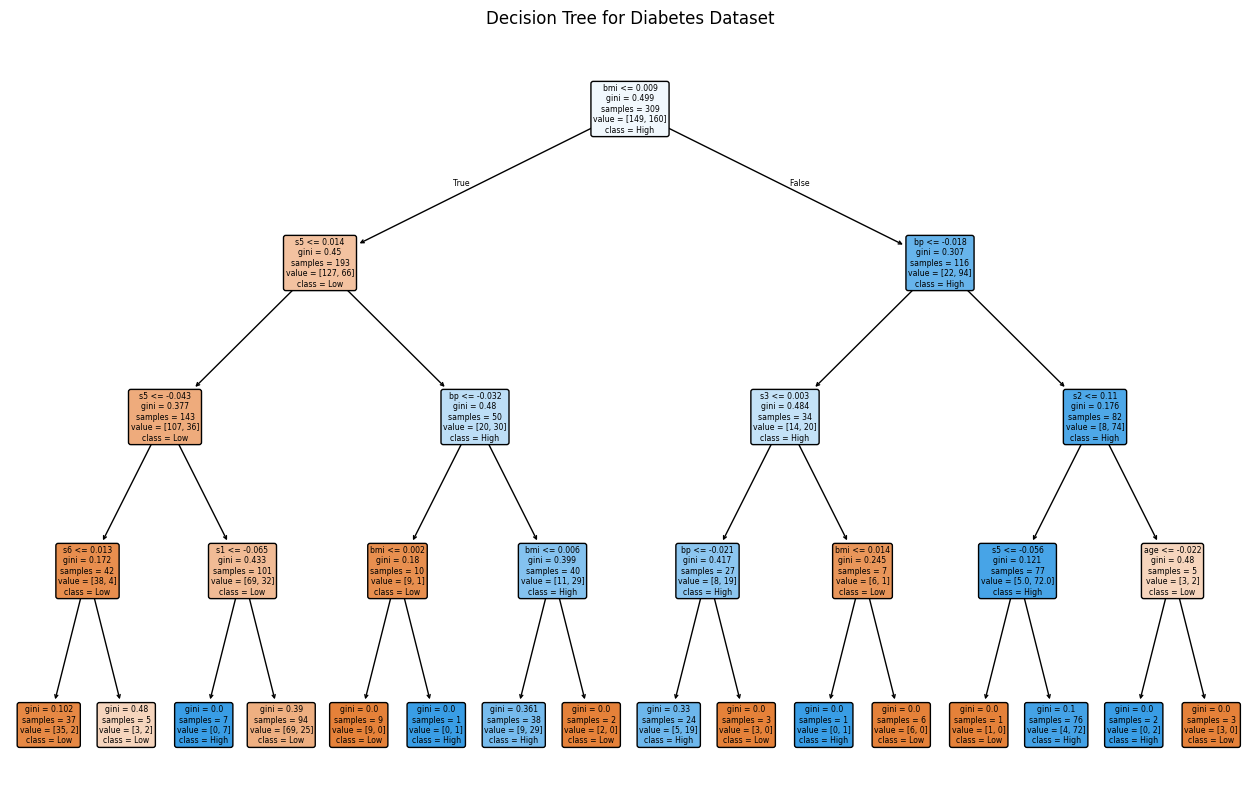

In [ ]:
#Implement a Decision Tree on the diabetes dataset and display the tree structure
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
data = load_diabetes(as_frame=True)
df = data.frame
df['target'] = (df['target'] >= 140).astype(int)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(16,10))
plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True, rounded=True)
plt.title("Decision Tree for Diabetes Dataset")
plt.show()

In [ ]:
#Implement a simple Naive Bayes model on a loan dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
naive = pd.read_csv("/content/drive/MyDrive/ML/loan_dataset.csv")
naive['Dependents'] = naive['Dependents'].replace('3+', 3).astype(int)
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    naive[col] = le.fit_transform(naive[col])
naive = naive.drop('Loan_ID', axis=1)
X = naive.drop('Loan_Status', axis=1)
y = naive['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 2]]


In [ ]:
# Implement SVC on breast cancer dataset.
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print("Feature matrix shape:", X.shape)
print("Target classes:", data.target_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Feature matrix shape: (569, 30)
Target classes: ['malignant' 'benign']
Accuracy: 0.956140350877193

Confusion Matrix:
 [[41  2]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
#Implement KNN on IRIS dataset.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
print("Feature matrix shape:", X.shape)
print("Target classes:", iris.target_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Feature matrix shape: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']
Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



CLUSTERING

In [ ]:
# Implement all the clustering distance measures (similarity measures)
# I. Euclidean distance
# ii. Manhattan distance
# iii. cosine similarity
# iv. minkowski
# v. jaccard index
import numpy as np
from scipy.spatial.distance import cdist
from collections import Counter
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))
def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return dot_product / (norm_x * norm_y)
def minkowski_distance(x, y, p=3):
    return np.power(np.sum(np.abs(x - y) ** p), 1/p)
def jaccard_index(x, y):
    intersection = np.sum(np.minimum(x, y))
    union = np.sum(np.maximum(x, y))
    return intersection / union
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
set_x = np.array([1, 0, 1, 0, 1])
set_y = np.array([0, 1, 1, 0, 1])
print("Euclidean Distance:", euclidean_distance(x, y))
print("Manhattan Distance:", manhattan_distance(x, y))
print("Cosine Similarity:", cosine_similarity(x, y))
print("Minkowski Distance (p=3):", minkowski_distance(x, y, p=3))
print("Jaccard Index:", jaccard_index(set_x, set_y))

Euclidean Distance: 5.196152422706632
Manhattan Distance: 9
Cosine Similarity: 0.9746318461970762
Minkowski Distance (p=3): 4.3267487109222245
Jaccard Index: 0.5


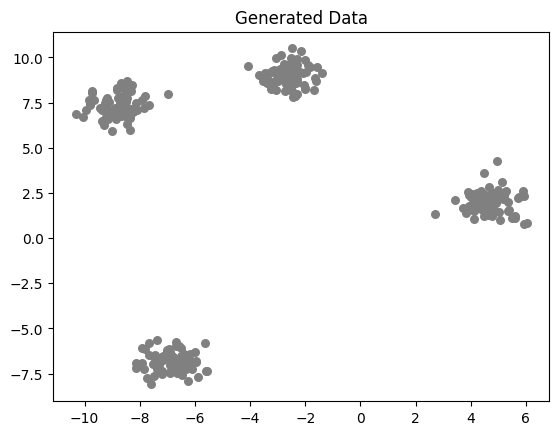

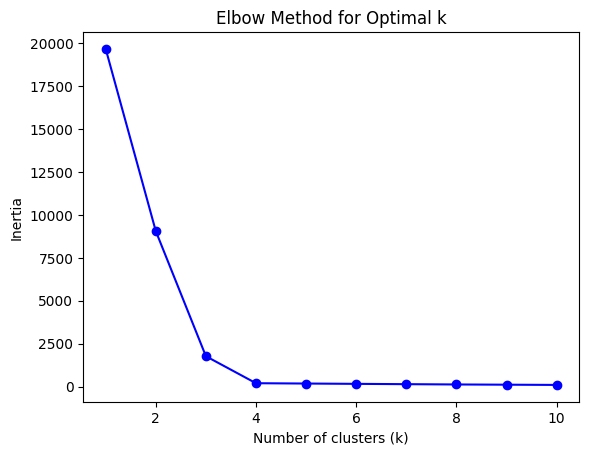

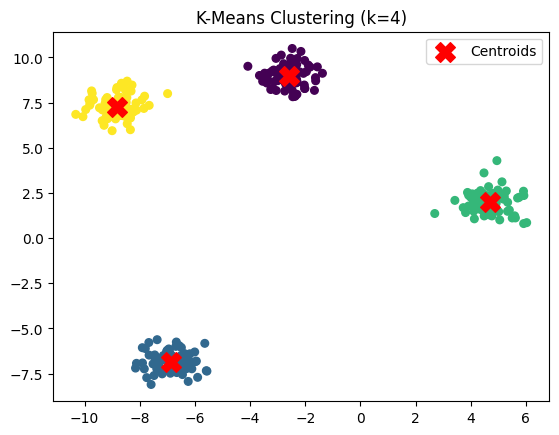

In [ ]:
# Implement K- means algorithm to find the clusters. (also demonstrate with elbow method)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=30, color='gray')
plt.title("Generated Data")
plt.show()
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, 'bo-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.legend()
plt.show()

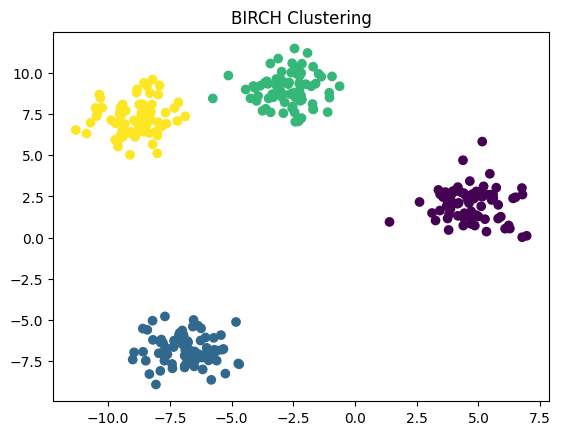

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


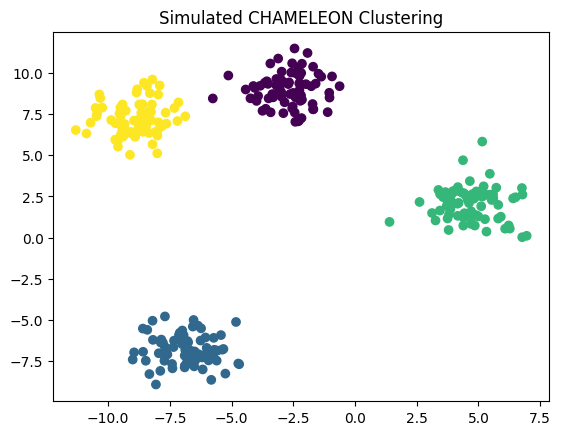

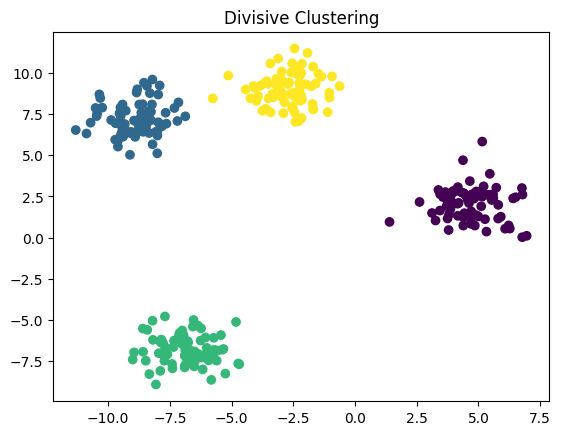

In [ ]:
# Implement hierarchical clustering
# I. agglomerative (BIRCH and CHAMELEON)
# ii. Divisive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
#BIRCH AND CHAMELEON
X, y = make_blobs(n_samples=300, centers=4, random_state=42)
birch_model = Birch(threshold=1.5, n_clusters=4)
birch_model.fit(X)
labels = birch_model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("BIRCH Clustering")
plt.show()
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)
model = AgglomerativeClustering(n_clusters=4, connectivity=knn_graph)
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Simulated CHAMELEON Clustering")
plt.show()
#divisive
from sklearn.cluster import KMeans
def divisive_clustering(X, max_clusters=4):
    clusters = {0: X}
    labels = np.zeros(X.shape[0], dtype=int)
    next_label = 1
    while len(clusters) < max_clusters:
        cluster_to_split = max(clusters, key=lambda k: len(clusters[k]))
        data = clusters.pop(cluster_to_split)
        if len(data) <= 1:
            clusters[cluster_to_split] = data
            continue
        kmeans = KMeans(n_clusters=2)
        split_labels = kmeans.fit_predict(data)
        clusters[cluster_to_split] = data[split_labels == 0]
        clusters[next_label] = data[split_labels == 1]
        idx = 0
        for i in range(X.shape[0]):
            if np.any(np.all(X[i] == data, axis=1)):
                if split_labels[idx] == 0:
                    labels[i] = cluster_to_split
                else:
                    labels[i] = next_label
                idx += 1
        next_label += 1
    return labels
div_labels = divisive_clustering(X, max_clusters=4)
plt.scatter(X[:, 0], X[:, 1], c=div_labels)
plt.title("Divisive Clustering")
plt.show()

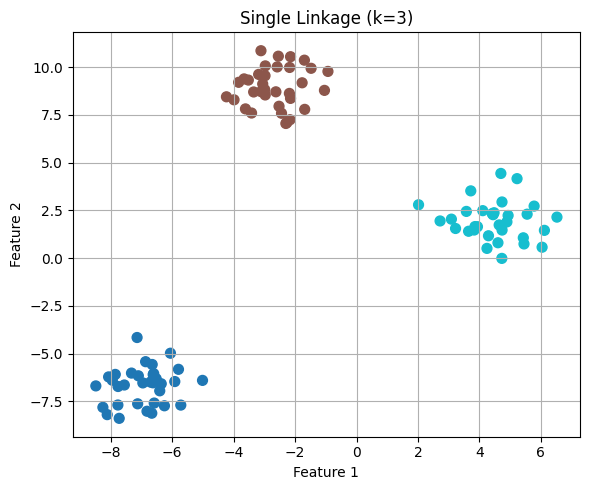

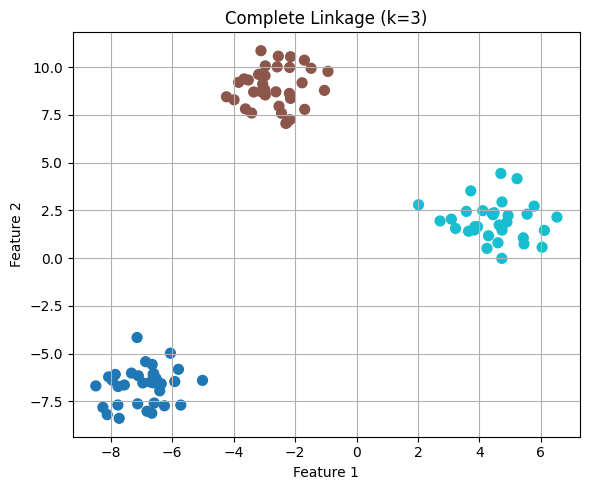

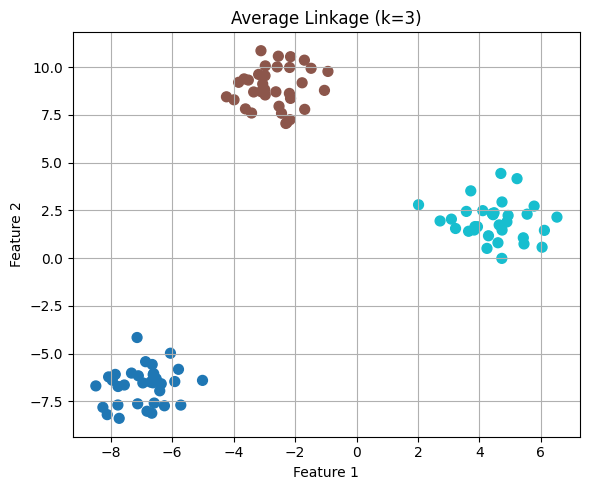

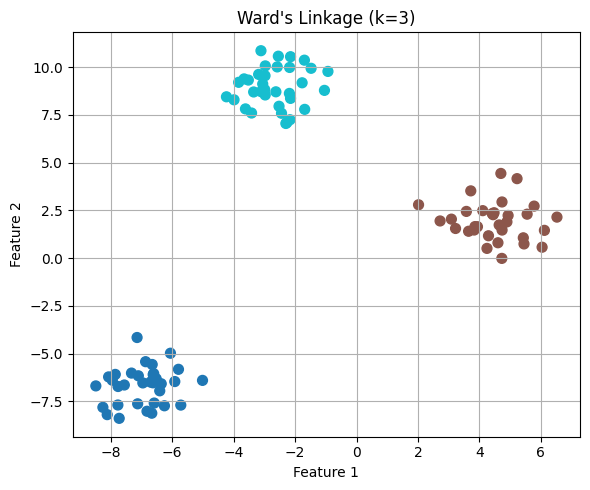

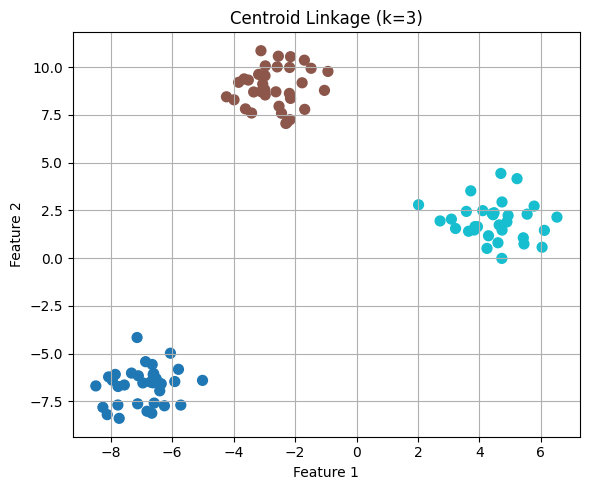

In [ ]:
# Implement Types of Linkages
# Single Linkage
# Complete Linkage
# Average Linkage
# Ward's Linkage
# Centroid-Linkage
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)
linkage_methods = {
    'single': "Single Linkage",
    'complete': "Complete Linkage",
    'average': "Average Linkage",
    'ward': "Ward's Linkage",
    'centroid': "Centroid Linkage"
}
def run_and_plot_clustering(X, method, title, num_clusters=3):
    Z = linkage(X, method=method)
    labels = fcluster(Z, t=num_clusters, criterion='maxclust')
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(f"{title} (k={num_clusters})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
for method, title in linkage_methods.items():
    run_and_plot_clustering(X, method, title, num_clusters=3)

/tmp/ipython-input-2414239883.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


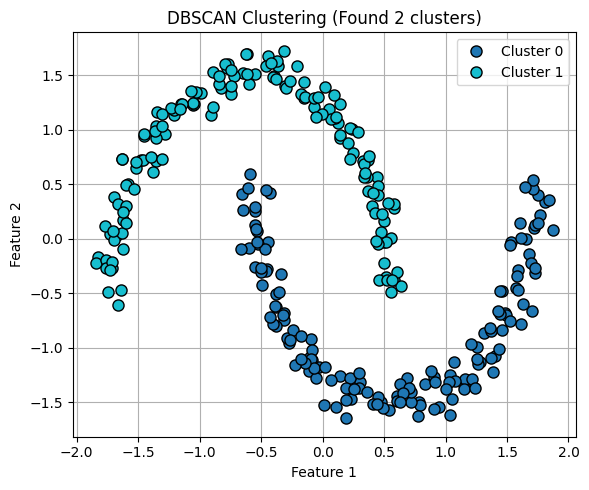

In [ ]:
# Implement DBSCAN clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)
unique_labels = set(labels)
n_clusters = len([label for label in unique_labels if label != -1])
colors = plt.cm.get_cmap("tab10", len(unique_labels))
plt.figure(figsize=(6, 5))
for label in unique_labels:
    color = 'k' if label == -1 else colors(label)
    marker = 'x' if label == -1 else 'o'
    class_member_mask = (labels == label)
    plt.plot(X[class_member_mask, 0], X[class_member_mask, 1], marker, markerfacecolor=color,
             markeredgecolor='k', markersize=8, linestyle='None', label=f'Cluster {label}' if label != -1 else 'Noise')
plt.title(f"DBSCAN Clustering (Found {n_clusters} clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


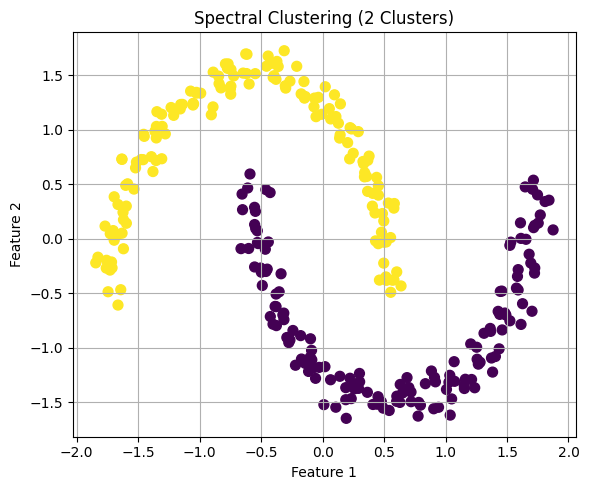

In [ ]:
#Implement Spectral Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = model.fit_predict(X)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Spectral Clustering (2 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

ENSEMBLE LEARNING

Decision Tree Classifier Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Random Forest Classifier (100 estimators) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


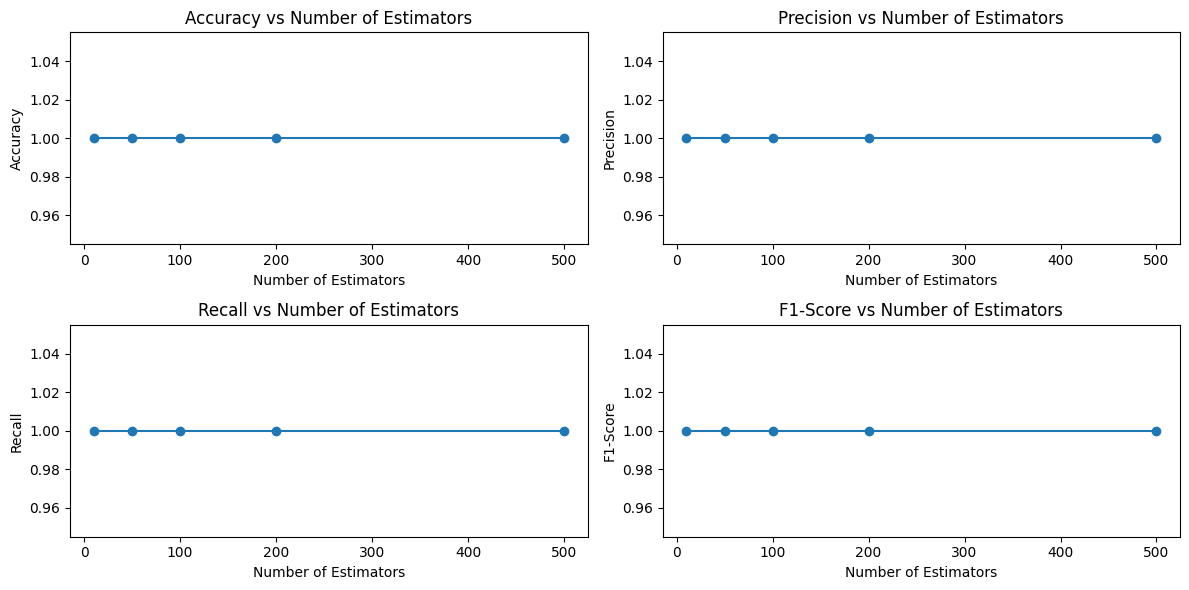

In [ ]:
# 1. Comparing Single vs. Ensemble Classifiers
# Task:
# Write a program that demonstrates the advantage of ensemble learning compared to a single classifier.
# Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
# Compare their performance using evaluation metrics such as accuracy, precision, recall,and F1-score.
# Explore the effect of changing the number of estimators (decision trees) in Random Forest. Write clear observations with justification.
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
rf_classifier_default = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_default.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
y_pred_rf_default = rf_classifier_default.predict(X_test)
accuracy_rf_default = accuracy_score(y_test, y_pred_rf_default)
precision_rf_default = precision_score(y_test, y_pred_rf_default, average='weighted')
recall_rf_default = recall_score(y_test, y_pred_rf_default, average='weighted')
f1_rf_default = f1_score(y_test, y_pred_rf_default, average='weighted')
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("\nRandom Forest Classifier (100 estimators) Performance:")
print(f"Accuracy: {accuracy_rf_default:.4f}")
print(f"Precision: {precision_rf_default:.4f}")
print(f"Recall: {recall_rf_default:.4f}")
print(f"F1-Score: {f1_rf_default:.4f}")
estimators = [10, 50, 100, 200, 500]
accuracy_rf = []
precision_rf = []
recall_rf = []
f1_rf = []
for n_estimators in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_rf = rf_classifier.predict(X_test)
    accuracy_rf.append(accuracy_score(y_test, y_pred_rf))
    precision_rf.append(precision_score(y_test, y_pred_rf, average='weighted'))
    recall_rf.append(recall_score(y_test, y_pred_rf, average='weighted'))
    f1_rf.append(f1_score(y_test, y_pred_rf, average='weighted'))
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(estimators, accuracy_rf, marker='o')
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.subplot(2, 2, 2)
plt.plot(estimators, precision_rf, marker='o')
plt.title('Precision vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision')
plt.subplot(2, 2, 3)
plt.plot(estimators, recall_rf, marker='o')
plt.title('Recall vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')
plt.subplot(2, 2, 4)
plt.plot(estimators, f1_rf, marker='o')
plt.title('F1-Score vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

In [ ]:
# Write a program that demonstrates the use of simple ensemble techniques: Max Voting, Average Voting, and Weighted Average Voting (assign weights based on each model’s performance).Apply these techniques on a suitable dataset and compare results.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(max_iter=200, random_state=42)
clf3 = KNeighborsClassifier()
clf1.fit(X_train_final, y_train_final)
clf2.fit(X_train_final, y_train_final)
clf3.fit(X_train_final, y_train_final)
val_pred1 = clf1.predict(X_val)
val_pred2 = clf2.predict(X_val)
val_pred3 = clf3.predict(X_val)
acc1 = accuracy_score(y_val, val_pred1)
acc2 = accuracy_score(y_val, val_pred2)
acc3 = accuracy_score(y_val, val_pred3)
weights = np.array([acc1, acc2, acc3])
weights = weights / weights.sum()
print(f"Validation Accuracies: DT={acc1:.3f}, LR={acc2:.3f}, KNN={acc3:.3f}")
print(f"Normalized Weights: {weights}")
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)
proba1 = clf1.predict_proba(X_test)
proba2 = clf2.predict_proba(X_test)
proba3 = clf3.predict_proba(X_test)
from scipy.stats import mode
hard_votes = np.vstack([pred1, pred2, pred3]).T
max_voting_pred, _ = mode(hard_votes, axis=1)
max_voting_pred = max_voting_pred.flatten()
avg_proba = (proba1 + proba2 + proba3) / 3
avg_voting_pred = np.argmax(avg_proba, axis=1)
weighted_avg_proba = weights[0]*proba1 + weights[1]*proba2 + weights[2]*proba3
weighted_voting_pred = np.argmax(weighted_avg_proba, axis=1)
def evaluate(y_true, y_pred, method_name):
    print(f"\nEvaluation for {method_name}:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred, average='macro'):.4f}")
evaluate(y_test, max_voting_pred, "Max Voting (Hard Voting)")
evaluate(y_test, avg_voting_pred, "Average Voting (Soft Voting)")
evaluate(y_test, weighted_voting_pred, "Weighted Average Voting")
print("\nIndividual Classifiers Performance:")
evaluate(y_test, pred1, "Decision Tree")
evaluate(y_test, pred2, "Logistic Regression")
evaluate(y_test, pred3, "K-Nearest Neighbors")

Validation Accuracies: DT=1.000, LR=1.000, KNN=1.000
Normalized Weights: [0.33333333 0.33333333 0.33333333]

Evaluation for Max Voting (Hard Voting):
Accuracy:  0.9333
Precision: 0.9345
Recall:    0.9333
F1-score:  0.9333

Evaluation for Average Voting (Soft Voting):
Accuracy:  0.8889
Precision: 0.8899
Recall:    0.8889
F1-score:  0.8888

Evaluation for Weighted Average Voting:
Accuracy:  0.8889
Precision: 0.8899
Recall:    0.8889
F1-score:  0.8888

Individual Classifiers Performance:

Evaluation for Decision Tree:
Accuracy:  0.8889
Precision: 0.8899
Recall:    0.8889
F1-score:  0.8888

Evaluation for Logistic Regression:
Accuracy:  0.9333
Precision: 0.9345
Recall:    0.9333
F1-score:  0.9333

Evaluation for K-Nearest Neighbors:
Accuracy:  0.9556
Precision: 0.9608
Recall:    0.9556
F1-score:  0.9554


In [ ]:
UNIT -5 Programs
4.MLP on MNIST dataset and display its train and test data score.
5. Find the relation between learning rate and loss (or) number  of iterations and loss.
6. Find the relation between number of neurons with learning rate and iterations.

In [ ]:
#1.Simple Perceptron (basic code)
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def activation(self, x):
        return np.where(x >= 0, 1, 0)
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation(linear_output)
        return y_predicted
if __name__ == "__main__":
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    y = np.array([0, 0, 0, 1])  # AND gate output
    perceptron = Perceptron(learning_rate=0.1, n_iters=10)
    perceptron.fit(X, y)
    predictions = perceptron.predict(X)
    print("Predictions:", predictions)

Predictions: [0 0 0 1]


In [ ]:
#2.Perceptron with activation Function with AND, OR (linear data), XOR (non linear data)
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def activation(self, x):
        return np.where(x >= 0, 1, 0)
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([0,1,1,1])
perceptron_and = Perceptron()
perceptron_and.fit(X_and, y_and)
print("AND gate predictions:", perceptron_and.predict(X_and))
perceptron_or = Perceptron()
perceptron_or.fit(X_or, y_or)
print("OR gate predictions:", perceptron_or.predict(X_or))

AND gate predictions: [0 0 0 1]
OR gate predictions: [0 1 1 1]


In [ ]:
#3.MLP with single hidden Layer (with various number of neurons).
